# Ex05 - Filtros de aguçamento

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

from IPython.display import Image
from IPython.display import display
import skimage
from scipy.ndimage import gaussian_filter
from PIL import Image

In [12]:
#Função inspirada no trabalho do Mauro Brandão para mostrar as imagens
def disp(f, n_img):
    from PIL import Image
    import matplotlib.pyplot as plt
    
    images=[]
    for f_i in f:
        images.append(Image.fromarray(np.uint8(f_i)))
 
    # tamanho do display de cada imagem 
    dpi=72  # padrao da funcao display da biblioteca PIL
    altura,largura=images[0].size # em pixels (assumimos o mesmo tamanho para todas)
    figsizeinches=largura/float(dpi),altura/float(dpi) # em polegadas
    fig = plt.figure(figsize=figsizeinches)
    
    # valores iniciais
    xpos=0
    ypos=0
    espacamento=0.02
    tam=1
    
    #mod
    max_row_size=n_img
    i=0
    
    for image in images:
        ax=fig.add_axes([xpos,ypos,tam,tam]) 
        ax.axis('off')
        ax.imshow(image, cmap='gray')
        
        # incrementos
        i=i+1                  # contagem de figuras
        if i%max_row_size==0:  # troca de linha
            xpos=0
            ypos=ypos-tam-espacamento
        else:                  # continua na linha
            xpos=xpos+tam+espacamento
    plt.show()
    
def histogram(f):

    return np.bincount(f.ravel())

def circle(s, r, c): #s: dimensões fora da imagem, r: raio, c: centro da imagem
    rows, cols = s[0], s[1]
    rr0,  cc0  = c[0], c[1]
    rr, cc = np.meshgrid(range(rows), range(cols), indexing='ij')
    g = (rr - rr0)**2 + (cc - cc0)**2 <= r**2
    return g

## Resolução Exercício 1

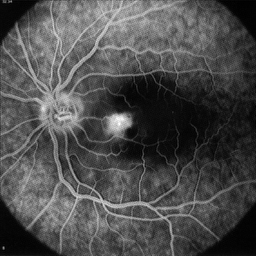

In [3]:
imagem = Image.open('../data/retina.tif')
img = np.array(imagem)
imagem

filtro gaussiano: 
[[ 0.0625  0.125   0.0625]
 [ 0.125   0.25    0.125 ]
 [ 0.0625  0.125   0.0625]]


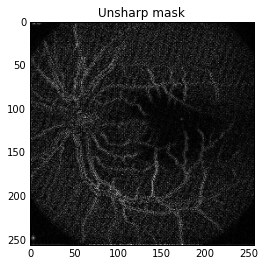

In [4]:
filter_gaussian = ((np.array([[1.0,2.0,1.0], [2.0,4.0,2.0], [1.0,2.0,1.0]]))*(1.0/16.0)).astype('float')
print 'filtro gaussiano: \n',filter_gaussian

#img_fil = gaussian_filter(img, sigma=0.1)
img_filtrada = signal.convolve(img, filter_gaussian, mode='same')

df = np.abs(img - img_filtrada)
dfnorm = ia.normalize(df)

#df2 = np.abs(img - imgg_filtrada)
#dfnorm2 = ia.normalize(df2)

plt.imshow(dfnorm, cmap='gray')
plt.title('Unsharp mask')
plt.show()

#plt.imshow(dfnorm2, cmap='gray')
#plt.title('Unsharp mask')
#plt.show()

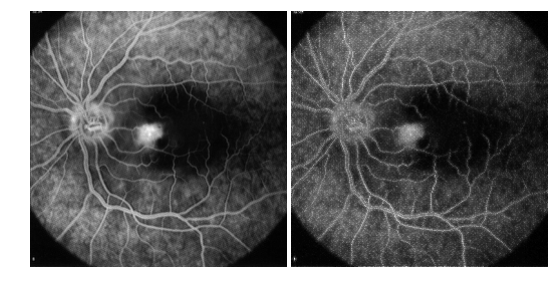

In [5]:
k = 0.8
img_df = ((1-k)*img + (k*df))
img_df_norm = ia.normalize(img_df)

#plt.imshow(img_df_norm, cmap='gray')
#plt.show()

disp([img, img_df], 2)

Podemos observar o efeito de realce de borda na imagem, porém não está muito fácil a visualização porque as bordas são estreitas. Para verificar melhor o efeito, foi gerada uma imagem sintética.

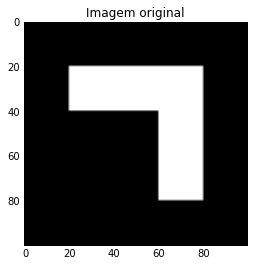

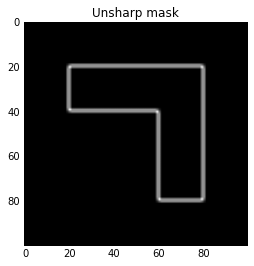

In [6]:
img_l = np.zeros((100, 100))
img_l[20:40, 20:60]=255
img_l[20:80, 60:80]=255

plt.imshow(img_l, cmap='gray')
plt.title('Imagem original')
plt.show()

imgl_filtrada = signal.convolve(img_l, filter_gaussian, mode='same')

dfl = np.abs(img_l - imgl_filtrada)
dfnorml = ia.normalize(dfl)

#df2 = np.abs(img - imgg_filtrada)
#dfnorm2 = ia.normalize(df2)

plt.imshow(dfnorml, cmap='gray')
plt.title('Unsharp mask')
plt.show()

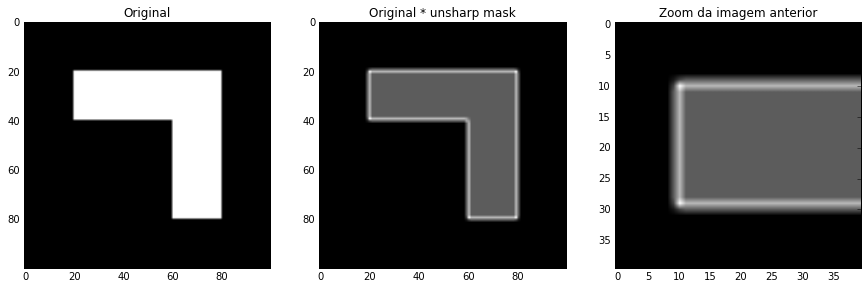

In [7]:
imgl_df = ((1-k)*img_l + (k*dfl))
imgl_df_norm = ia.normalize(imgl_df)

fig, ax = plt.subplots(1, 3, figsize=(15,15))
ax[0].imshow(img_l, cmap='gray')
ax[1].imshow(imgl_df_norm, cmap='gray')
ax[2].imshow(imgl_df_norm[10:50, 10:50], cmap='gray')

ax[0].set_title('Original')
ax[1].set_title('Original * unsharp mask')
ax[2].set_title('Zoom da imagem anterior')
plt.show()

## Resolução Exercício 2

In [8]:
Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print'Sv =\n',Sv

Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print'Sh =\n',Sh


Sv =
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sh =
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


S: 
[[ 6  0 -6]
 [ 0  0  0]
 [-6  0  6]]


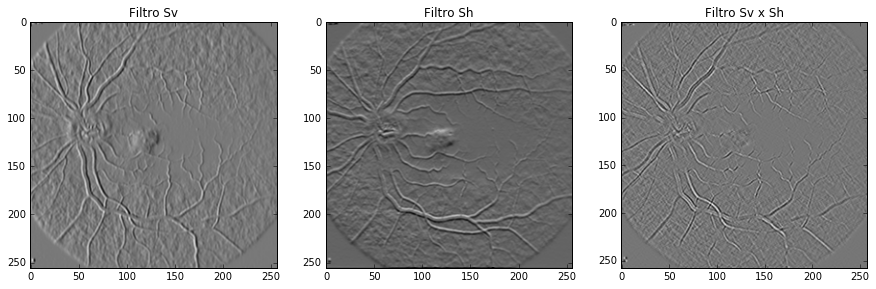

In [10]:
S = np.dot(Sh, Sv)
fv = signal.convolve(img, Sv, mode='same')
fh = signal.convolve(img, Sh, mode='same')
fig3 = signal.convolve(img, S, mode='full')

print 'S: \n', S

fig, ax = plt.subplots(1, 3, figsize=(15,15))
ax[0].imshow(fv, cmap='gray')
ax[1].imshow(fh, cmap='gray')
ax[2].imshow(fig3, cmap='gray')

ax[0].set_title('Filtro Sv')
ax[1].set_title('Filtro Sh')
ax[2].set_title('Filtro Sv x Sh')
plt.show()


Podemos observar quando utilizamos o kernel Sv, ele realça apenas as veias verticais, e quando utiliza o  kernel Sh, o filtro realça apenas as veias horizontais. Podemos verificar também o efeito da multiplicação das máscaras Sv e Sh. Isso seria interessante aplicado em uma determinada região da imagem que se deseja realçar.

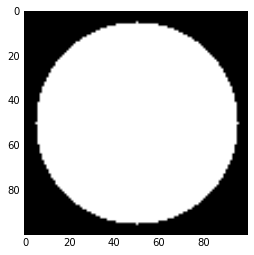

In [14]:
x = circle([100,100], 45, [50,50])

plt.imshow(x, cmap='gray')
plt.show()

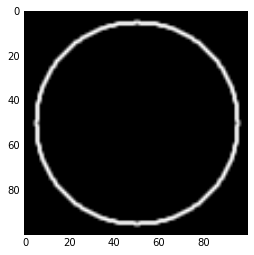

C:\Users\Fernanda\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in divide


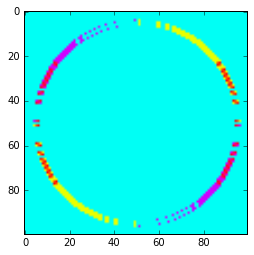

In [21]:
import numpy as np
fvx = signal.convolve(x, Sv, mode='same')
fhx = signal.convolve(x, Sh, mode='same')

fmag = np.sqrt((fhx**2)+(fvx**2))
fmagn = ia.normalize(fmag)

fmag[fmag < 10] = 0

plt.imshow(fmagn, cmap='gray')
plt.show()

beta = np.arctan((fvx/fhx))

#Tc = ia.colormap('hsv')
#beta_color = Tc[beta]
#Tc = ia.colormap('hot')
#g = ia.applylut(fmagn,Tc).astype('uint8')


plt.imshow(beta, cmap='hsv')
plt.show()

#plt.plot(g)
#plt.show()

#plt.imshow(ia.normalize(beta), cmap='hsv')
#plt.show()

Não consegui utilizar as funções utilizando o ia.colormap, pois eu iria inserir as cores apenas nas bordas.

C:\Users\Fernanda\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in divide


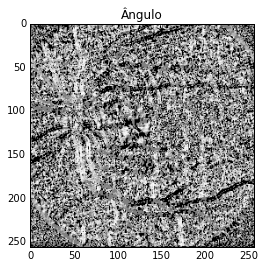

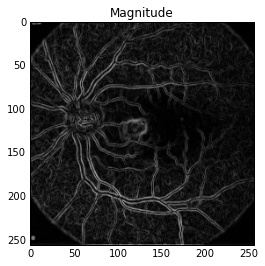

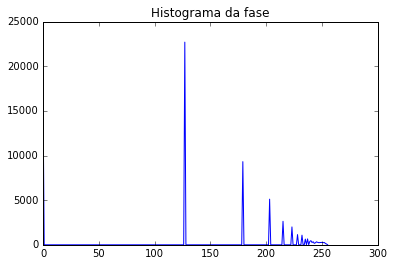

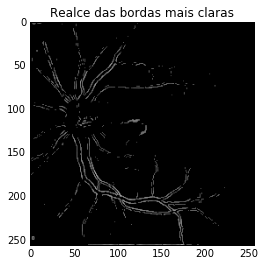

In [25]:
fvh = np.sqrt((fh**2)+(fv**2))
fvhn = ia.normalize(fvh)

alfa =  np.abs(np.arctan((fv/fh)))
plt.imshow(alfa, cmap='gray')
plt.title(u'Ângulo')
plt.show()

plt.imshow(fvhn, cmap='gray')
plt.title('Magnitude')
plt.show()

alfah = histogram(ia.normalize(alfa))

plt.plot(alfah)
plt.title('Histograma da fase')
plt.show()

fvhn[fvhn < 80] = 0

plt.imshow(fvhn, cmap='gray')
plt.title('Realce das bordas mais claras')
plt.show()

## Resolução Exercício 3

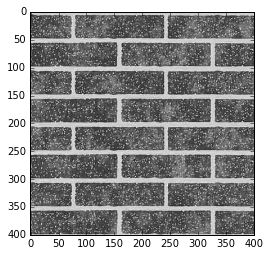

In [26]:
gato = Image.open('../data/tijolo.jpg').convert('L')
ga = np.array(gato)

plt.imshow(ga, cmap='gray')
plt.show()


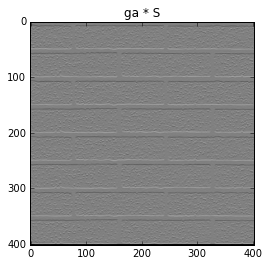

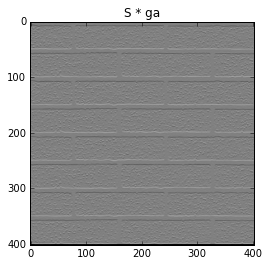

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [27]:
ga3 = signal.convolve(ga, Sh)
ga4 = signal.convolve(Sh, ga)

plt.imshow(ga3, cmap='gray')
plt.title('ga * S')
plt.show()

plt.imshow(ga4, cmap='gray')
plt.title('S * ga')
plt.show()

#print ga3

erro = ga3-ga4
print erro

#plt.plot(erro)
#plt.title('Erro')
#plt.show()

#### Convolução associativa

Definição:

    f(x,y) - imagem;
    
    g(x,y) - filtro passa-baixa;
    
    h(x,y) - filtro passa-alta;

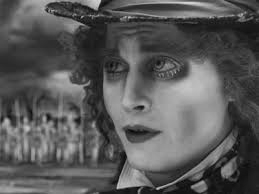

In [28]:
f_chape = Image.open('../data/chape.jpg').convert('L')
f_chape

In [29]:
f = np.array(f_chape)
print 'f: \n', f

g = np.array([[1,2,1], [2,4,2], [1,2,1]])
print 'g: \n', g

h = (np.array([[1,-2,1],[-2,5,-2], [1,-2,1]]))
print 'h: \n', h

f: 
[[ 80  76  71 ...,  36  34  31]
 [ 77  74  68 ...,  39  38  36]
 [ 73  70  65 ...,  52  49  44]
 ..., 
 [150 151 152 ...,  27  27  27]
 [131 132 133 ...,  30  30  31]
 [106 107 108 ...,  30  30  31]]
g: 
[[1 2 1]
 [2 4 2]
 [1 2 1]]
h: 
[[ 1 -2  1]
 [-2  5 -2]
 [ 1 -2  1]]


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


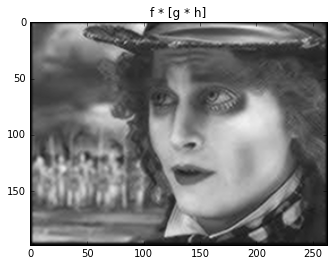

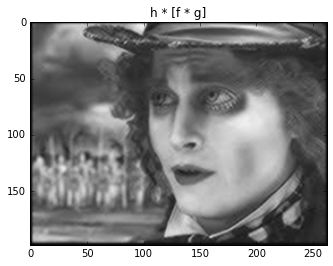

In [30]:
fgh = signal.convolve(signal.convolve(g, h), f)
hfg = signal.convolve(signal.convolve(f, g), h)

erro2 = fgh - hfg
print erro2

#plt.plot(erro2)
#plt.title('Erro')
#plt.show()


plt.imshow(fgh, cmap='gray')
plt.title('f * [g * h]')
plt.show()

plt.imshow(hfg, cmap='gray')
plt.title('h * [f * g]')
plt.show()

Podemos provar após as análises das imagens acima que é verdadeira as teorias da convolução, nesse caso comutativa e associativa. Podemos observar que foi necessário utilizar o 'mode=full', o qual causa o efeito de borda devido ao tamanho necessário da convolução. No caso da comutativa, se usássemos 'mode=valid' iria dar erro devido ao tamanho do kernel.